In [1]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [2]:
import numpy as np
from sklearn.datasets import fetch_openml
mnist = fetch_openml(name='mnist_784', version=1, cache=True)
mnist.target = mnist.target.astype(np.int8) 
sort_by_target(mnist)

In [3]:
x, y = mnist["data"], mnist["target"]

In [4]:
y

array([0, 0, 0, ..., 9, 9, 9], dtype=int8)

In [5]:
X_train, X_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [6]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=5, tol=-np.infty, random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=-inf,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
from sklearn.model_selection import cross_val_score

In [10]:
print(cross_val_score(sgd_clf, X_train, y_train_5, cv=4, scoring="accuracy"))

[0.96186921 0.96846667 0.967      0.9554637 ]


In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
forest_clf = RandomForestClassifier(n_estimators=10, random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_5, cv=3,
                                    method="predict_proba")

In [12]:
len([j for i,j in y_probas_forest if j ==True])

1474

In [13]:
# This Classifier will take the longest time to run on the data
from sklearn.neighbors import KNeighborsClassifier

In [14]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
        plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
        plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

In [15]:
#plot_learning_curves(forest_clf, X_train, y_train)

''''''error=[]
for i in range(1,70):
    knn=KNeighborsClassifier(n_neighbors=i,metric='minkowski',weights='distance')
    knn.fit(X_train, y_train_5)
    predi=knn.predict(X_test)
    error.append(np.mean(predi!=y_test))
for i,er in enumerate(error):
    if error[i]==min(error):
        print("the minimum error is at range or say with nearest neighbour of : "+str(i))

        
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))  
plt.plot(range(1, 70), error, color='red', linestyle='dashed', marker=,  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error') ''''''

## https://scikit-learn.org/stable/modules/multiclass.html

In [27]:
from sklearn.multiclass import OneVsRestClassifier
clf1 = OneVsRestClassifier(RandomForestClassifier(n_estimators=10))
clf1.fit(X_train,y_train)

OneVsRestClassifier(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          n_jobs=None)

In [28]:
Y_predict=clf1.predict(X_test)

In [29]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, Y_predict)

array([[ 963,    0,    2,    0,    0,    1,    6,    1,    7,    0],
       [   0, 1117,    7,    1,    1,    1,    4,    0,    3,    1],
       [   9,    0,  974,   10,    6,    0,    0,    9,   21,    3],
       [   2,    0,    8,  945,    1,    7,    3,   14,   23,    7],
       [   1,    1,    2,    0,  929,    0,    4,    1,    8,   36],
       [   3,    2,    1,   13,    1,  844,    9,    3,    9,    7],
       [   3,    3,    0,    1,    2,    6,  930,    0,   11,    2],
       [   0,    4,   19,    1,    3,    1,    0,  977,    4,   19],
       [   1,    1,    8,   10,    2,    8,    4,    9,  918,   13],
       [   5,    5,    0,   10,   12,    3,    1,   12,    9,  952]])

In [30]:
Diagonal_sum=confusion_matrix(y_test, Y_predict).trace()
sum_confusion_matrix=confusion_matrix(y_test, Y_predict).sum()
Diagonal_sum/sum_confusion_matrix

0.9549

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, Y_predict)

0.9549

In [36]:
def plot_confusion_matrix(matrix):
    """If you prefer color and a colorbar"""
    fig = plt.figure(figsize=(8,8))
    ax = fig.add_subplot(111)
    cax = ax.matshow(matrix)
    fig.colorbar(cax)

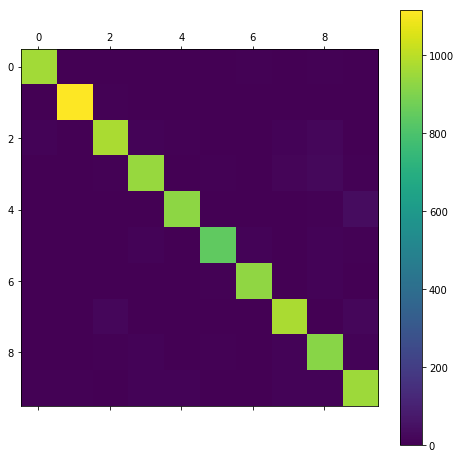

In [37]:
plot_confusion_matrix(confusion_matrix(y_test, Y_predict))

In [39]:
sum_confusion_matrix

10000

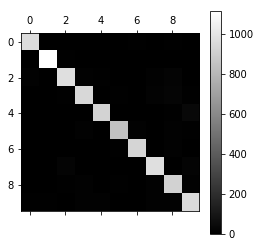

In [41]:
plt.matshow(confusion_matrix(y_test, Y_predict), cmap=plt.cm.gray)
plt.colorbar()

In [42]:
row_sums = confusion_matrix(y_test, Y_predict).sum(axis=1, keepdims=True)
norm_conf_mx = confusion_matrix(y_test, Y_predict)/ row_sums

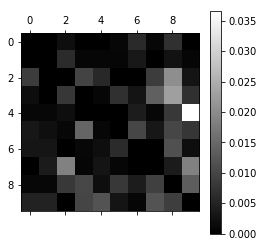

In [44]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.colorbar()

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier(n_jobs=-1, weights='distance', n_neighbors=4)
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
           weights='distance')

In [46]:
y_knn_pred = knn_clf.predict(X_test)

In [47]:
accuracy_score(y_test, y_knn_pred)

0.9714

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

array([0.9090182 , 0.91129556, 0.90833625])

In [49]:
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)

In [50]:
confusion_matrix(y_train,y_train_pred)

array([[5730,    2,   25,   11,    9,   46,   46,   10,   40,    4],
       [   2, 6479,   45,   21,    6,   41,    8,    8,  120,   12],
       [  52,   38, 5330,  103,   76,   27,   93,   57,  171,   11],
       [  53,   40,  141, 5343,    2,  223,   35,   47,  146,  101],
       [  23,   29,   46,    9, 5352,   11,   55,   33,   87,  197],
       [  70,   40,   38,  200,   70, 4584,  109,   28,  189,   93],
       [  29,   24,   42,    2,   33,   95, 5643,    6,   44,    0],
       [  30,   26,   68,   28,   48,    8,    6, 5782,   16,  253],
       [  48,  148,   71,  178,   15,  142,   52,   24, 5044,  129],
       [  47,   32,   29,   86,  161,   35,    2,  194,   77, 5286]])

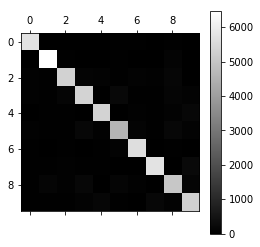

In [51]:
plt.matshow(confusion_matrix(y_train, y_train_pred), cmap=plt.cm.gray)
plt.colorbar()

In [53]:
row_sums_new = confusion_matrix(y_train, y_train_pred).sum(axis=1, keepdims=True)
norm_conf_mx_new = confusion_matrix(y_train, y_train_pred) / row_sums

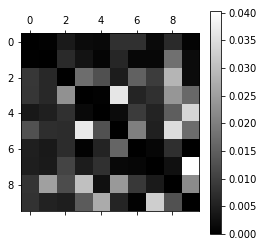

In [54]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.colorbar()